<a href="https://colab.research.google.com/github/Priyanka-Joshi31/image_classification/blob/main/CNN_17__Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/raw-images.zip

Archive:  /content/drive/MyDrive/raw-images.zip
replace __MACOSX/._raw-images? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import keras
from keras.models import Sequential
from keras import layers
from keras.datasets import cifar10

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images = train_images / 255
test_images = test_images / 255

train_labels = to_categorical(train_labels, len(classes))
test_labels = to_categorical(test_labels, len(classes))

In [ ]:
model = Sequential()

# Feature Learning Parts
model.add(layers.Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

# Classification Parts
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classes), activation = "softmax"))

In [ ]:
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=20)

Epoch 1/20
782/782 [==============================] - 13s 11ms/step - loss: 1.6650 - accuracy: 0.4194
Epoch 2/20
782/782 [==============================] - 9s 12ms/step - loss: 1.2067 - accuracy: 0.5731
Epoch 3/20
782/782 [==============================] - 9s 11ms/step - loss: 1.0489 - accuracy: 0.6349
Epoch 4/20
782/782 [==============================] - 9s 12ms/step - loss: 0.9507 - accuracy: 0.6706
Epoch 5/20
782/782 [==============================] - 9s 11ms/step - loss: 0.9133 - accuracy: 0.6857
Epoch 6/20
782/782 [==============================] - 9s 11ms/step - loss: 0.8422 - accuracy: 0.7095
Epoch 7/20
782/782 [==============================] - 9s 12ms/step - loss: 0.8032 - accuracy: 0.7235
Epoch 8/20
782/782 [==============================] - 8s 11ms/step - loss: 0.7699 - accuracy: 0.7349
Epoch 9/20
782/782 [==============================] - 9s 12ms/step - loss: 0.7451 - accuracy: 0.7437
Epoch 10/20
782/782 [==============================] - 9s 11ms/step - loss: 0.7243 - accur

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.5536 - accuracy: 0.8101


[0.5536308884620667, 0.8101000189781189]

313/313 [==============================] - 2s 5ms/step


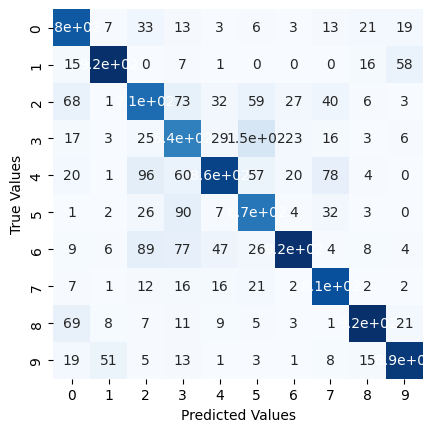

In [ ]:
y_pred = model.predict(test_images)

Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(test_labels, 1)

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
f1_score(Y_test, Y_pred, average="macro")

0.8089095137610848

In [ ]:
precision_score(Y_test, Y_pred, average="macro")

0.8129006174742361

In [ ]:
recall_score(Y_test, Y_pred, average="macro")

0.8100999999999999